In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt

# Problem Statement
Let's use the same two data points as before - a house with 1025 square feet sold for Rs.54,65,000 and a house with 1965 square feet sold for Rs.85,76,000. 
|Square Feet |Price in Lakhs|
|-----|--------|
|1025|54.65       |
|1965|85.76     |      |
      |


In [8]:
x_train = np.array([1025,1965])   #features
y_train = np.array([54.65,85.76])   #target value

In [10]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = w*x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = cost/(2*m)
    return total_cost

In [12]:
def compute_gradient(x, y, w, b):
    dj_dw = 0
    dj_db = 0
    m = x.shape[0]
    for i in range(m):
        f_wb = w*x[i] + b
        dj_dw =+ (f_wb - y[i])*x[i]
        dj_db =+ (f_wb - y[i])
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw , dj_db
    

In [44]:
def gradient_descent(x, y, win, bin, alpha, itr, pd_gradient, t_cost):
    p_history = []
    j_history = []
    w_history = []
    b_history = []
    w = copy.deepcopy(win)
    b = copy.deepcopy(bin)
    for i in range(itr):
        dj_dw , dj_db = pd_gradient(x,y,w,b)
        temp_b = b - alpha * dj_db
        temp_w = w - alpha * dj_dw
        b = temp_b
        w = temp_w
        '''if i<10000:
            p_history.append([w,b])
            j_history.append(t_cost(x,y,w,b))
            w_history.append(w)
            b_history.append(b)
        if i % math.ceil(itr/10) == 0:
            print(f"Iteration {i:4}  cost : {j_history[i]:1e}  dj_dw : {dj_dw:0.3e}  dj_db : {dj_db:0.3e}  b : {b:0.3e}  w : {w:3e}")'''
    #return w,b,t_cost(x,y,w,b),j_history,w_history,b_history
    return t_cost(x,y,w,b)

In [16]:
w,b,j,j_history,w_history,b_history = gradient_descent(x_train, y_train, 0, 0, 1e-10, 10000, compute_gradient, compute_cost)

Iteration    0  cost : 2.584404e+03  dj_dw : -8.426e+04  dj_db : -4.288e+01  b : 4.288e-09  w : 8.425920e-06
Iteration 1000  cost : 1.796491e+03  dj_dw : -6.946e+04  dj_db : -3.535e+01  b : 3.903e-06  w : 7.670088e-03
Iteration 2000  cost : 1.255341e+03  dj_dw : -5.727e+04  dj_db : -2.914e+01  b : 7.118e-06  w : 1.398649e-02
Iteration 3000  cost : 8.828951e+02  dj_dw : -4.721e+04  dj_db : -2.403e+01  b : 9.768e-06  w : 1.919383e-02
Iteration 4000  cost : 6.259279e+02  dj_dw : -3.892e+04  dj_db : -1.981e+01  b : 1.195e-05  w : 2.348684e-02
Iteration 5000  cost : 4.481192e+02  dj_dw : -3.209e+04  dj_db : -1.633e+01  b : 1.375e-05  w : 2.702607e-02
Iteration 6000  cost : 3.246661e+02  dj_dw : -2.645e+04  dj_db : -1.346e+01  b : 1.524e-05  w : 2.994387e-02
Iteration 7000  cost : 2.386135e+02  dj_dw : -2.181e+04  dj_db : -1.110e+01  b : 1.646e-05  w : 3.234935e-02
Iteration 8000  cost : 1.783574e+02  dj_dw : -1.798e+04  dj_db : -9.150e+00  b : 1.747e-05  w : 3.433246e-02
Iteration 9000  cos

In [39]:
print(j)

105.94137102531658


Now the thing here is in order to get the minimal cost we will need to iteratively select the value of learning rate alpha. Learning rate alpha is an hyper parameter which will tell us how big of the step we will take in order to reach the minimum point. Now, if alpha is large then the step size is also large and if a alpha is small than the step size will also be small meaning here time taken to reach the minimum will be greater with respect to the number of step taken for small alpha.

**Now we will try to automate and find the value of alpha iteratively which will give us minimal cost after the 10k iteration**

In [35]:
n = 1
alpha = [ n := n / 10 for i in range(20)]

In [37]:
print(alpha)

[0.1, 0.01, 0.001, 0.0001, 1e-05, 1.0000000000000002e-06, 1.0000000000000002e-07, 1.0000000000000002e-08, 1.0000000000000003e-09, 1.0000000000000003e-10, 1.0000000000000003e-11, 1.0000000000000002e-12, 1.0000000000000002e-13, 1.0000000000000002e-14, 1e-15, 1.0000000000000001e-16, 1e-17, 1e-18, 1.0000000000000001e-19, 1.0000000000000001e-20]


In [113]:
cost_val  = []
alpha_val = []
for i in alpha:
    for j in range(1,10):
        alpha_val.append(i*j)
        cost_val.append(gradient_descent(x_train, y_train, 0, 0, i*j, 10000, compute_gradient, compute_cost))

C:\Users\wormh\AppData\Local\Temp\ipykernel_14964\1246984883.py:7: RuntimeWarning: overflow encountered in scalar multiply
  dj_dw =+ (f_wb - y[i])*x[i]
C:\Users\wormh\AppData\Local\Temp\ipykernel_14964\1246984883.py:6: RuntimeWarning: overflow encountered in scalar multiply
  f_wb = w*x[i] + b
C:\Users\wormh\AppData\Local\Temp\ipykernel_14964\2597290387.py:10: RuntimeWarning: invalid value encountered in scalar subtract
  temp_b = b - alpha * dj_db
C:\Users\wormh\AppData\Local\Temp\ipykernel_14964\2597290387.py:11: RuntimeWarning: invalid value encountered in scalar subtract
  temp_w = w - alpha * dj_dw


In [114]:
print(cost_val)

[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 24.577447378949618, nan, nan, nan, nan, nan, nan, nan, nan, 24.577447378949618, 24.577447378949582, 24.57744737894955, 24.57744737894955, 24.57744737894955, 24.57744737894955, 24.57744737894955, 24.577447378949582, 24.577447378949618, 24.577447378950428, 24.577447378950005, 24.577447378949866, 24.577447378949795, 24.577447378949724, 24.577447378949724, 24.57744737894969, 24.57744737894969, 24.577447378949618, 24.57744827692584, 24.577447378954126, 24.577447378952577, 24.577447378951838, 24.577447378951344, 24.577447378951064, 24.57744737895085, 24.577447378950712, 24.57744737895057, 105.94137102531658, 30.27472375224414, 25.274972783065035, 24.675807251713138, 24.59163500442609, 24.579500022584774, 24.577744387691048, 24.57749034185073, 24.577453591359298, 1797.19

In [117]:
print(alpha_val)

[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009000000000000001, 0.0001, 0.0002, 0.00030000000000000003, 0.0004, 0.0005, 0.0006000000000000001, 0.0007, 0.0008, 0.0009000000000000001, 1e-05, 2e-05, 3.0000000000000004e-05, 4e-05, 5e-05, 6.000000000000001e-05, 7.000000000000001e-05, 8e-05, 9e-05, 1.0000000000000002e-06, 2.0000000000000003e-06, 3.0000000000000005e-06, 4.000000000000001e-06, 5.000000000000001e-06, 6.000000000000001e-06, 7.000000000000001e-06, 8.000000000000001e-06, 9.000000000000002e-06, 1.0000000000000002e-07, 2.0000000000000004e-07, 3.000000000000001e-07, 4.000000000000001e-07, 5.000000000000001e-07, 6.000000000000002e-07, 7.000000000000002e-07, 8.000000000000002e-07, 9.000000000000002e-07, 1.0000000000000002e-08, 2.0000000000000004e-08, 3.0000000000000004e-08, 4.000000000000001e-08, 5.000000000000001e-08, 6.0000000

In [62]:
import pandas as pd 
#dropna will not work 'tried'

In [119]:
nan = cost_val[0]
temp_cost_val = [ x for x in cost_val if (math.isnan(x) == False)]

In [121]:
print(temp_cost_val)

[24.577447378949618, 24.577447378949618, 24.577447378949582, 24.57744737894955, 24.57744737894955, 24.57744737894955, 24.57744737894955, 24.57744737894955, 24.577447378949582, 24.577447378949618, 24.577447378950428, 24.577447378950005, 24.577447378949866, 24.577447378949795, 24.577447378949724, 24.577447378949724, 24.57744737894969, 24.57744737894969, 24.577447378949618, 24.57744827692584, 24.577447378954126, 24.577447378952577, 24.577447378951838, 24.577447378951344, 24.577447378951064, 24.57744737895085, 24.577447378950712, 24.57744737895057, 105.94137102531658, 30.27472375224414, 25.274972783065035, 24.675807251713138, 24.59163500442609, 24.579500022584774, 24.577744387691048, 24.57749034185073, 24.577453591359298, 1797.196302374893, 1255.8557124142965, 883.2650078615438, 626.1895805459789, 448.30202474619955, 324.79228094438116, 238.69955844496448, 178.41540141563075, 135.9834653344828, 2492.5168093635866, 2403.1200737630697, 2317.0311900343986, 2234.1263722051385, 2154.28649368093

In [123]:
min_cost = min(temp_cost_val)
print(min_cost)

24.57744737894955


In [125]:
index = cost_val.index(min_cost)
print(index)


56


In [127]:
a = alpha_val[index] #minimized cost for alpha at loc. 3 in alpha_val

In [131]:
def min_gradient_descent(x, y, win, bin, alpha, itr, pd_gradient, t_cost):
    p_history = []
    j_history = []
    w_history = []
    b_history = []
    w = copy.deepcopy(win)
    b = copy.deepcopy(bin)
    for i in range(itr):
        dj_dw , dj_db = pd_gradient(x,y,w,b)
        temp_b = b - alpha * dj_db
        temp_w = w - alpha * dj_dw
        b = temp_b
        w = temp_w
        if i<10001:
            p_history.append([w,b])
            j_history.append(t_cost(x,y,w,b))
            w_history.append(w)
            b_history.append(b)
        if i % math.ceil(itr/10) == 0:
            print(f"Iteration {i:4}  cost : {j_history[i]:1e}  dj_dw : {dj_dw:0.3e}  dj_db : {dj_db:0.3e}  b : {b:0.3e}  w : {w:3e}")
    return w,b,t_cost(x,y,w,b),j_history,w_history,b_history
    #return t_cost(x,y,w,b)
w,b,j,j_history,w_history,b_history = min_gradient_descent(x_train, y_train, 0, 0, a, 10000, compute_gradient, compute_cost)

Iteration    0  cost : 5.321084e+02  dj_dw : -8.426e+04  dj_db : -4.288e+01  b : 1.286e-05  w : 2.527776e-02
Iteration 1000  cost : 2.457745e+01  dj_dw : 0.000e+00  dj_db : 0.000e+00  b : 2.221e-05  w : 4.364375e-02
Iteration 2000  cost : 2.457745e+01  dj_dw : 0.000e+00  dj_db : 0.000e+00  b : 2.221e-05  w : 4.364375e-02
Iteration 3000  cost : 2.457745e+01  dj_dw : 0.000e+00  dj_db : 0.000e+00  b : 2.221e-05  w : 4.364375e-02
Iteration 4000  cost : 2.457745e+01  dj_dw : 0.000e+00  dj_db : 0.000e+00  b : 2.221e-05  w : 4.364375e-02
Iteration 5000  cost : 2.457745e+01  dj_dw : 0.000e+00  dj_db : 0.000e+00  b : 2.221e-05  w : 4.364375e-02
Iteration 6000  cost : 2.457745e+01  dj_dw : 0.000e+00  dj_db : 0.000e+00  b : 2.221e-05  w : 4.364375e-02
Iteration 7000  cost : 2.457745e+01  dj_dw : 0.000e+00  dj_db : 0.000e+00  b : 2.221e-05  w : 4.364375e-02
Iteration 8000  cost : 2.457745e+01  dj_dw : 0.000e+00  dj_db : 0.000e+00  b : 2.221e-05  w : 4.364375e-02
Iteration 9000  cost : 2.457745e+01

In [137]:
print(f"Cost = {j}   W = {w}   B = {b}")

Cost = 24.57744737894955   W = 0.04364375460022284   B = 2.2210562137517977e-05


Now what we have done here is we calculated the value of learning rate alpha from 0.1 to 9 to the power minus 20 and Then we have created the variable cost val and alpha val in order to store the iterative values of cost and alpha. Note here the indexs of cost_val and alpha_val are in sync and after that we removed the nan values from cost_val and stored the cost values in the temp_cost_val then so find the minimum cost value from temp_cost_val and after we got the minimum cost we found the index at which the minimum cost is present in cost_val and then we find out the alpha value for that min cost using the same minimum cost index we got from cost_val

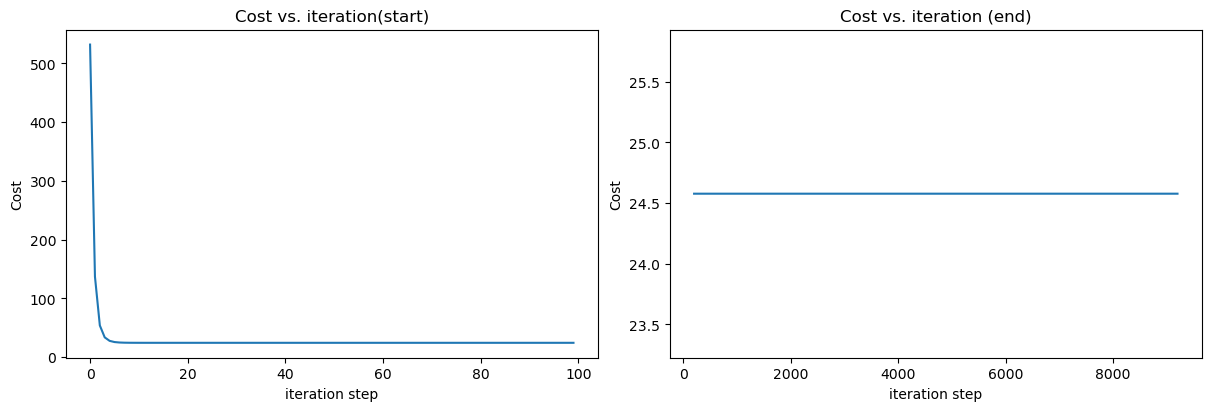

In [140]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(j_history[:100])
ax2.plot(200 + np.arange(len(j_history[1000:])), j_history[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

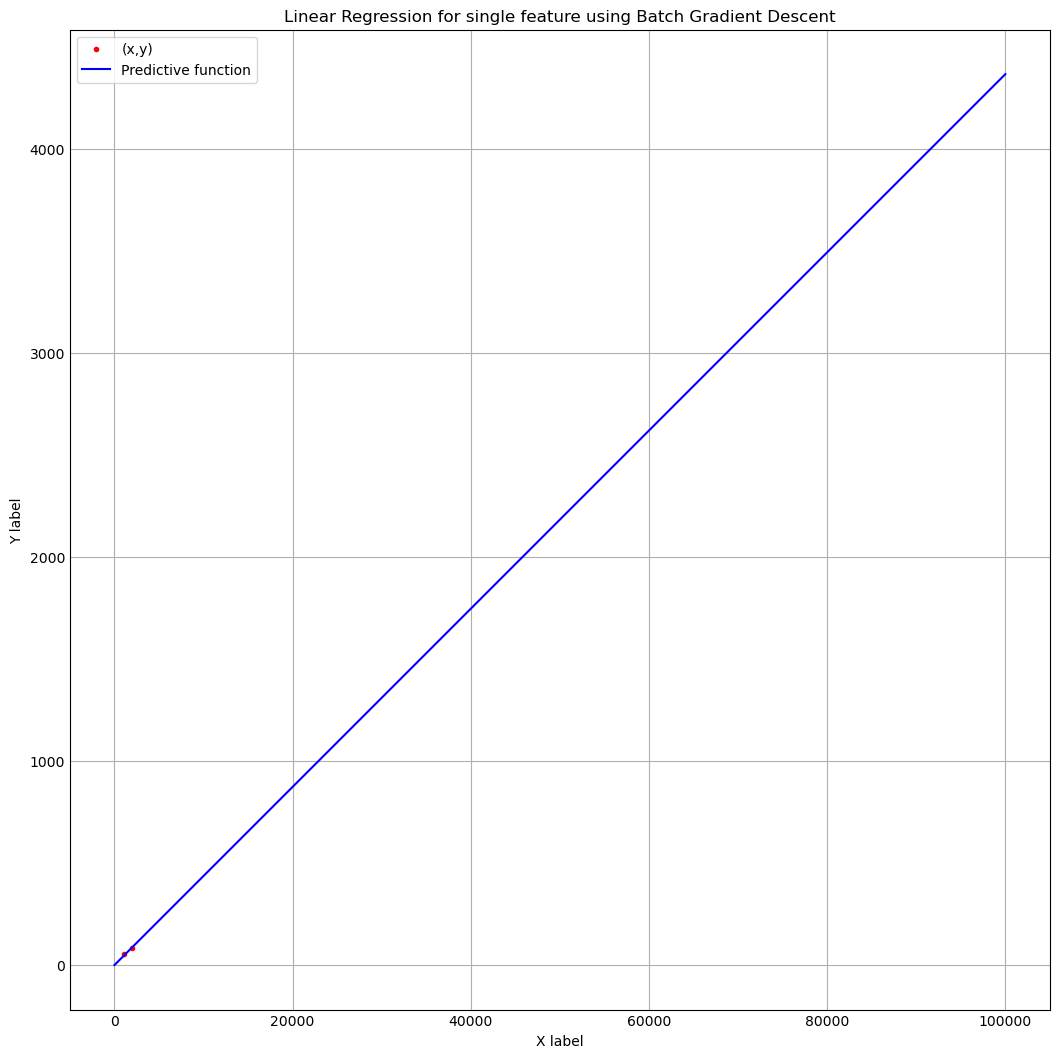

In [156]:
plt.style.use('_mpl-gallery')

fig, ax = plt.subplots(figsize=(10,10))

x = np.linspace(1,1e5,100)
y = w*x + b


ax.scatter(x_train,y_train,marker='.',c='red', label='(x,y)')
ax.plot(x,y,color='blue',label='Predictive function')


ax.set_xlabel('X label')
ax.set_ylabel('Y label')
ax.set_title('Linear Regression for single feature using Batch Gradient Descent')
ax.legend()
